**EXAMEN PARCIAL DE TECNICAS AVANZADAS DE DATA MINING Y SISTEMAS INTELIGENTES**


1. Cargamos/Montamos el repositorio donde se encuentra el DataSet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


2. Cargamos y descomprimimos el DataSet

In [2]:
!unzip "/content/drive/My Drive/TecnicasAvanzadasML/examenDL.zip"

Archive:  /content/drive/My Drive/TecnicasAvanzadasML/examenDL.zip
   creating: examenDL/
  inflating: examenDL/train.csv      
   creating: examenDL/.ipynb_checkpoints/
  inflating: examenDL/.ipynb_checkpoints/Examen-checkpoint.ipynb  


3. Importamos las librerias a usar y cargamos el csv

In [0]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

In [0]:
# Función para leer el archivo csv
def read_data_file(csv_path, row_count=None):
    dfcolumns = pd.read_csv(csv_path, nrows = 1)
    ncols = len(dfcolumns.columns)
    if row_count:
        df = pd.read_csv(csv_path, header = None, sep= ',', 
                     skiprows = 1, usecols = list(range(ncols)),
                     names = dfcolumns.columns, low_memory=False, nrows=row_count)
    else:
        df = pd.read_csv(csv_path, header = None, sep= ',', 
                         skiprows = 1, usecols = list(range(ncols)),
                         names = dfcolumns.columns, low_memory=False)
    return df

In [0]:
# Leemos el csv
# df = read_data_file("examenDL/train.csv")
df = pd.read_csv("examenDL/train.csv", nrows=1000000)

In [6]:
# Vemos como está compuesto el CSV
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


4. Hacemos el pre-procesamiento de la Data

In [0]:
# Función para remover los valores nulos
def remove_nan_values(df):
    df = df.replace(to_replace='None', value=np.nan).dropna()
    print(df.shape)
    df = df[(df != 0).all(1)]
    print(df.shape)
    return df

In [0]:
# Funcion para obtener la fecha por columnas Año, Mes. Dia, Hora 
def add_time_features(df):
    df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %Z')
    df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
    df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
    df['day'] = df['pickup_datetime'].apply(lambda x: x.day)
    df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
    df['weekday'] = df['pickup_datetime'].apply(lambda x: x.weekday())
    df['pickup_datetime'] =  df['pickup_datetime'].apply(lambda x: str(x))
   
    # Drop 'pickup_datetime' as we won't need it anymore
    df = df.drop('pickup_datetime', axis=1)
    
    return df

In [24]:
# Removemos los valores nulos del Data Frame
import numpy as np
df1 = remove_nan_values(df)
df1 = add_time_features(df1)

(999990, 8)
(976819, 8)


In [25]:
df1.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1


In [26]:
# Asignamos las variables características
features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','year','month','day','hour','weekday']
x = df1[features].values
print(x.shape)
x[:3]

(976819, 10)


array([[-7.3844311e+01,  4.0721319e+01, -7.3841610e+01,  4.0712278e+01,
         1.0000000e+00,  2.0090000e+03,  6.0000000e+00,  1.5000000e+01,
         1.7000000e+01,  0.0000000e+00],
       [-7.4016048e+01,  4.0711303e+01, -7.3979268e+01,  4.0782004e+01,
         1.0000000e+00,  2.0100000e+03,  1.0000000e+00,  5.0000000e+00,
         1.6000000e+01,  1.0000000e+00],
       [-7.3982738e+01,  4.0761270e+01, -7.3991242e+01,  4.0750562e+01,
         2.0000000e+00,  2.0110000e+03,  8.0000000e+00,  1.8000000e+01,
         0.0000000e+00,  3.0000000e+00]])

In [27]:
# La variable a predecir
y = df1['fare_amount']
print(y.shape)
y[:3]

(976819,)


0     4.5
1    16.9
2     5.7
Name: fare_amount, dtype: float64

In [28]:
# Dividimos la data de Entrenamiento y Pruebas
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42) # Rango 70 y 30
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((683773, 10), (293046, 10), (683773,), (293046,))

In [29]:
print (x_train)


[[-73.983515  40.781027 -73.97888  ...  27.        11.         4.      ]
 [-73.97775   40.786876 -73.786492 ...   3.         7.         0.      ]
 [-73.98224   40.765308 -73.985965 ...  30.        19.         2.      ]
 ...
 [-73.991781  40.748941 -73.983385 ...  24.         5.         3.      ]
 [-73.949822  40.793842 -73.979477 ...   7.        16.         0.      ]
 [-73.996862  40.736683 -73.949471 ...   9.        15.         3.      ]]


5. Creamos el Modelo y lo ejecutamos - Usando KERAS

In [32]:
# Librerias
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras import optimizers


# Parametros
bs = 128 # Batch size
epochs = 100
lr = 0.01


#scaler = preprocessing.MinMaxScaler()
#train_df_scaled = scaler.fit_transform(x_train)

# Modelo
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=10))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

adam = optimizers.adam(lr=0.0001)
model.compile(loss='mse', optimizer=adam, metrics=['mae']) # Usamos MAE como métrica al ser un problema de Regresión

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2816      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [33]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=[x_val, y_val])




Train on 683773 samples, validate on 293046 samples
Epoch 1/100





683773/683773 [==============================] - 85s 124us/step - loss: 159.8784 - mean_absolute_error: 9.3332 - val_loss: 826.2691 - val_mean_absolute_error: 5.9278
Epoch 2/100
683773/683773 [==============================] - 79s 115us/step - loss: 69.8903 - mean_absolute_error: 5.1321 - val_loss: 382.9086 - val_mean_absolute_error: 10.4690
Epoch 3/100
683773/683773 [==============================] - 79s 115us/step - loss: 55.3636 - mean_absolute_error: 4.4944 - val_loss: 106.5133 - val_mean_absolute_error: 5.9434
Epoch 4/100
683773/683773 [==============================] - 79s 115us/step - loss: 53.8779 - mean_absolute_error: 4.4165 - val_loss: 154.7371 - val_mean_absolute_error: 10.5990
Epoch 5/100
683773/683773 [==============================] - 78s 115us/step - loss: 52.1902 - mean_absolute_error: 4.3450 - val_loss: 103.8855 - val_mean_absolute_error: 6.5436
Epoch 6/100
683773/683773 [=========================

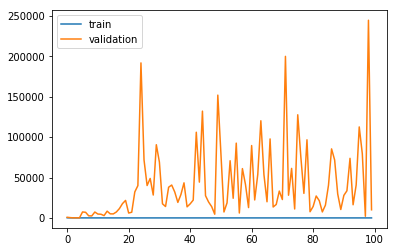

In [34]:
# Ploteamos las perdidas
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend();

In [35]:
val_loss, val_mean_absolute_error = model.evaluate(x_val, y_val)
print(f'Loss = {val_loss:.2f}\n MAE = {val_mean_absolute_error:.2f}')

293046/293046 [==============================] - 20s 69us/step
Loss = 10067.15
 MAE = 7.17
